# 2023 Oct 6th, Tutorial 1

## Intro

So today will be about the diversity of models and what different models can do for us. Typically everyone has an intuition about how different analysis tools can extract different kinds of information from experimental data; you choose a different analysis depending on your question. However, this is less appreciated for models. But it’s the same for them; you want to build a different kind of model to answer different kinds of questions. It all depends on your goals. So today, we will examine three kinds of models that we can classify as (according to Dayan and Abbott, 2001): **what**, **how**, and **why** models.

Each tutorial will guide you through one of those models to describe the exact same data: the time interval between neuronal action potentials, aka inter-spike interval (ISI). In tutorial 1, we will ask what function best describes the shape of the ISI distribution (it’s an exponential distribution). Such a “what” model can compactly describe the ISI distribution and allows, for example, to quantify ISI properties across datasets, task conditions, brain areas etc. In tutorial 2, we ask which mechanism could generate the observed ISI distribution. Such a “how” model proposes a specific way that a system produces the observed behavior. Here, you will see that it’s a balance between excitation and inhibition that generates exponentially distributed ISIs. Finally we will ask “why” the exponential distribution is the most optimal way to code information in neurons. “Why” models thus ask about the underlying principles of a phenomenon.

In any research, we typically start with descriptive (“what”) models; you will see examples of those during the model fitting, GLM, dimensionality reduction, and deep learning days. Next, we often ask about the mechanisms and build “how” models to generate or test hypotheses of underlying mechanisms; examples of those will be in linear systems, real neurons, dynamic networks, and decision making days. Ultimately, we are usually interested in the underlying reason of why the phenomenon exists in the first place; examples of those are in Bayes, optimal Control, and reinforcement learning days. “Why” models are often the hardest to achieve; “what” models are usually the easiest. But more importantly, they allow answering different questions, provide different insights and have different utilities. Thinking about the question I want to answer, why I want to answer this question (i.e. my goal) and the hypotheses I want to evaluate determines my own modeling choices every day. The resulting diversity in models is great because all models address different facets of a problem (like in today's 3 tutorials) and are thus complementary in our quest for knowledge. Today’s materials will hopefully allow you to better appreciate the opportunities and limitations offered by all the modeling tools you will learn during the course.


# Model Types: "What" models

We would like to acknowledge [Steinmetz _et al._ (2019)](https://www.nature.com/articles/s41586-019-1787-x) for sharing their data, a subset of which is used here.


___
# Tutorial Objectives
This is tutorial 1 of a 3-part series on different flavors of models used to understand neural data. In this tutorial we will explore 'What' models, used to describe the data. To understand what our data looks like, we will visualize it in different ways. Then we will compare it to simple mathematical models. Specifically, we will:

- Load a dataset with spiking activity from hundreds of neurons and understand how it is organized
- Make plots to visualize characteristics of the spiking activity across the population
- Compute the distribution of "inter-spike intervals" (ISIs) for a single neuron
- Consider several formal models of this distribution's shape and fit them to the data "by hand"

# Setup



Python requires you to explictly "import" libraries before their functions are available to use. We will always specify our imports at the beginning of each notebook or script.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Tutorial notebooks typically begin with several set-up steps that are hidden from view by default.

**Important:** Even though the code is hidden, you still need to run it so that the rest of the notebook can work properly. Step through each cell, either by pressing the play button in the upper-left-hand corner or with a keyboard shortcut (`Cmd-Return` on a Mac, `Ctrl-Enter` otherwise). A number will appear inside the brackets (e.g. `[3]`) to tell you that the cell was executed and what order that happened in.

If you are curious to see what is going on inside each cell, you can double click to expand. Once expanded, double-click the white space to the right of the editor to collapse again.

In [2]:
#@title Figure Settings
import ipywidgets as widgets #interactive display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [5]:
#@title Helper functions

#@markdown Most of the tutorials make use of helper functions
#@markdown to simplify the code that you need to write. They are defined here.

# Please don't edit these, or worry about understanding them now!

def restrict_spike_times(spike_times, interval):
  """Given a spike_time dataset, restrict to spikes within given interval.

  Args:
    spike_times (sequence of np.ndarray): List or array of arrays,
      each inner array has spike times for a single neuron.
    interval (tuple): Min, max time values; keep min <= t < max.

  Returns:
    np.ndarray: like `spike_times`, but only within `interval`
  """
  interval_spike_times = []
  for spikes in spike_times:
    interval_mask = (spikes >= interval[0]) & (spikes < interval[1])
    interval_spike_times.append(spikes[interval_mask])
  return np.array(interval_spike_times, object)

In [6]:
#@title Data retrieval
#@markdown This cell downloads the example dataset that we will use in this tutorial.
import io
import requests
r = requests.get('https://osf.io/sy5xt/download')
if r.status_code != 200:
  print('Failed to download data')
else:
  spike_times = np.load(io.BytesIO(r.content), allow_pickle=True)['spike_times']

In [ ]:
spike_times

---

# Section 1: Exploring the Steinmetz dataset

In this tutorial we will explore the structure of a neuroscience dataset. 

We consider a subset of data from a study of [Steinmetz _et al._ (2019)](https://www.nature.com/articles/s41586-019-1787-x). In this study, Neuropixels probes were implanted in the brains of mice. Electrical potentials were measured by hundreds of electrodes along the length of each probe. Each electrode's measurements captured local variations in the electric field due to nearby spiking neurons. A spike sorting algorithm was used to infer spike times and cluster spikes according to common origin: a single cluster of sorted spikes is causally attributed to a single neuron.

In particular, a single recording session of spike times and neuron assignments was loaded and assigned to `spike_times` in the preceding setup. 

Typically a dataset comes with some information about its structure. However, this information may be incomplete. You might also apply some transformations or "pre-processing" to create a working representation of the data of interest, which might go partly undocumented depending on the circumstances. In any case it is important to be able to use the available tools to investigate unfamiliar aspects of a data structure. 

Let's see what our data looks like...

### summary of the paper 

summary of the Steinmetz-paper mentioned above "Distributed coding of choice, action and engagement across the mouse brain" from Steimetz et al. 

Disclaimer: The summary was done by the AI-Tool https://www.explainpaper.com :

Page 1
- The study reveals the spatial distribution of neurons in the mouse brain that encode vision, choice, action, and behavioral engagement during a visual discrimination task.

Page 2

- The study recorded activity from 29,134 neurons across 42 brain regions during a task where mice distinguished visual stimuli and made choices, revealing significant modulation in firing rates.

Page 3

- Neural activity in the brain during task performance is primarily driven by non-specific movement correlates, while responses to visual stimuli are largely confined to a restricted visual pathway.

Page 4

- Neurons encoding choice exhibit a distinctive bilateral encoding of both choices in the forebrain, while midbrain neurons show unilateral encoding of contralateral choices.

Page 5

- Neurons encoding vision are localized, while neurons encoding action are found globally across various brain regions.

Page 6

- The engagement index, a neural signature of brain-wide activity, can predict mouse responses to stimuli and is distinct from movement and reward correlates.

Page 7

- The study reveals that global non-selective action correlates in the mouse brain are ubiquitous and may underlie task-related activity, highlighting distinct encoding of choice in forebrain and midbrain regions.

Page 8

- The study identifies organizing principles for the distribution and character of neuronal correlates in a lateralized visual discrimination task across the mouse brain.

Page 9

- The experiments involved 10 mice trained on a two-alternative unforced choice task, following ethical guidelines and specific surgical procedures for data collection.

Page 10

- The study focused on analyzing the initial 400 ms period of trials to measure movement onset and reaction times in relation to subjects' choices during behavioral tasks.

Page 11

- Neurons were included for analysis only if they met specific criteria regarding spike waveform quality, firing rates, and the number of neurons from the same brain region.

Page 12

- The reduced-rank regression method outperformed alternative approaches in predicting neuron activity, demonstrating its effectiveness for estimating individual neuron selectivity and population decoding.

Page 13

- The study utilized jPECC analysis and nested multiple ANOVA tests to investigate neural firing rates and engagement indices in relation to task performance, revealing significant differences between active and passive conditions.

Page 14

- The combined-conditions choice probability (ccCP) algorithm allows for the calculation of choice probability across multiple stimulus conditions, preserving the core logic that trials are compared under identical stimulus conditions.

Page 15

- The median absolute deviation of alignment errors in the longitudinal mapping procedure was found to be 88.7 μm, which is comparable to the width of the probe shank (70 μm), indicating near resolution limits of the method.

Page 16

- The text references an extended data figure that will have a caption on the following page.

Page 17

- The study analyzes behavioral performance in mice using psychometric curves to assess choices based on stimulus contrasts, revealing insights into decision-making processes and wheel movement dynamics.

Page 18

- The text references an extended data figure with a caption on the next page.

Page 19

- The method for histological alignment involves coating probes with DiI, fitting a vector to probe tracks using regression, and validating alignment through visual receptive fields and cross-validation procedures.

Page 20

- Visual inspection of DiI tracks confirms that the probe passed through specific sub-surface brain regions during recording.

Page 21

- The text references an extended data figure in an article.

Page 22

- The focality index measures the distribution of neuronal representation across brain regions, with significant differences observed between Choice and Action kernels as well as contralateral Vision and Action.

Page 23

- The text references an extended data figure in an article.

Page 24

- The reduced-rank regression model consistently outperforms the Toeplitz and cosine models in predicting spike counts while overfitting fewer neurons.

Page 25

- The text references an extended data figure in an article.

Page 26

- The variance explained by the Action kernel is global, while contralateral Vision variance is restricted and Choice contributions are rare.

Page 27

- The text references an extended data figure in an article.

Page 28

- The analysis reveals that choice-selective neurons are primarily located in the frontal cortex, basal ganglia, midbrain, and certain thalamic nuclei around movement onset.

Page 29

- The text references an extended data figure in an article.

Page 30

- Visual cortex reliably leads frontal cortex and midbrain activity at around 100 ms after stimulus onset.

Page 31

- The text references an extended data figure in an article.

Page 32

- Non-neocortical brain regions exhibited higher pre-stimulus firing rates during engaged tasks compared to passive states, while neocortical regions showed the opposite pattern.

Page 33

- The text refers to a table detailing the brain regions that were recorded in an article.

Page 34

- Nature Research aims to enhance the reproducibility of published work by providing structured guidelines for consistent and transparent reporting.

Page 35

- All studies must disclose sample size, data exclusions, replication methods, and adhere to ethical guidelines when involving animal research.

## Section 1.1: Warming up with `spike_times`

What is the Python type of our variable?

In [7]:
type(spike_times)

numpy.ndarray

You should see `numpy.ndarray`, which means that it's a normal NumPy array.

If you see an error message, it probably means that you did not execute the set-up cells at the top of the notebook. So go ahead and make sure to do that.

Once everything is running properly, we can ask the next question about the dataset: what's its shape?

In [8]:
spike_times.shape

(734,)

There are 734 entries in one dimension, and no other dimensions. What is the Python type of the first entry, and what is *its* shape?

In [9]:
idx = 0
print(
  type(spike_times[idx]),
  spike_times[idx].shape,
  sep="\n",
)

<class 'numpy.ndarray'>
(826,)


It's also a NumPy array with a 1D shape! Why didn't this show up as a second dimension in the shape of `spike_times`? That is, why not `spike_times.shape == (734, 826)`?

To investigate, let's check another entry.

In [12]:
idx = 321
print(
  type(spike_times[idx]),
  spike_times[idx].shape,
  sep
  ="\n",
)

<class 'numpy.ndarray'>
(9723,)


It's also a 1D NumPy array, but it has a different shape. Checking the NumPy types of the values in these arrays, and their first few elements, we see they are composed of floating point numbers (not another level of `np.ndarray`):

In [13]:
i_neurons = [0, 321]
i_print = slice(0, 5)

for i in i_neurons:
  print(
    "Neuron {}:".format(i),
    spike_times[i].dtype,
    spike_times[i][i_print],
    "\n",
    sep="\n"
  )


Neuron 0:
float32
[ 0.8149   14.822467 24.9646   25.1436   38.8709  ]


Neuron 321:
float32
[1.0698667 1.1536334 1.2403667 1.7072    1.799    ]




Note that this time we've checked the NumPy `dtype` rather than the Python variable type. These two arrays contain floating point numbers ("floats") with 32 bits of precision.

The basic picture is coming together:
- `spike_times` is 1D, its entries are NumPy arrays, and its length is the number of neurons (734): by indexing it, we select a subset of neurons. 
- An array in `spike_times` is also 1D and corresponds to a single neuron; its entries are floating point numbers, and its length is the number of spikes attributed to that neuron. By indexing it, we select a subset of spike times for that neuron. 

Visually, you can think of the data structure as looking something like this:

```
| . . . . . |
| . . . . . . . . |
| . . . |
| . . . . . . . |
```

Before moving on, we'll calculate and store the number of neurons in the dataset and the number of spikes per neuron:

In [14]:
n_neurons = len(spike_times)
total_spikes_per_neuron = [len(spike_times_i) for spike_times_i in spike_times]

print(f"Number of neurons: {n_neurons}")
print(f"Number of spikes for first five neurons: {total_spikes_per_neuron[:5]}")

Number of neurons: 734
Number of spikes for first five neurons: [826, 2818, 3953, 646, 1115]


## Section 1.2: Getting warmer: counting and plotting total spike counts

As we've seen, the number of spikes over the entire recording is variable between neurons. More generally, some neurons tend to spike more than others in a given period. Lets explore what the distribution of spiking looks like across all the neurons in the dataset.

Are most neurons "loud" or "quiet", compared to the average? To see, we'll define bins of constant width in terms of total spikes and count the neurons that fall in each bin. This is known as a "histogram".

You can plot a histogram with the matplotlib function `plt.hist`. If you just need to compute it, you can use the numpy function `np.histogram` instead.

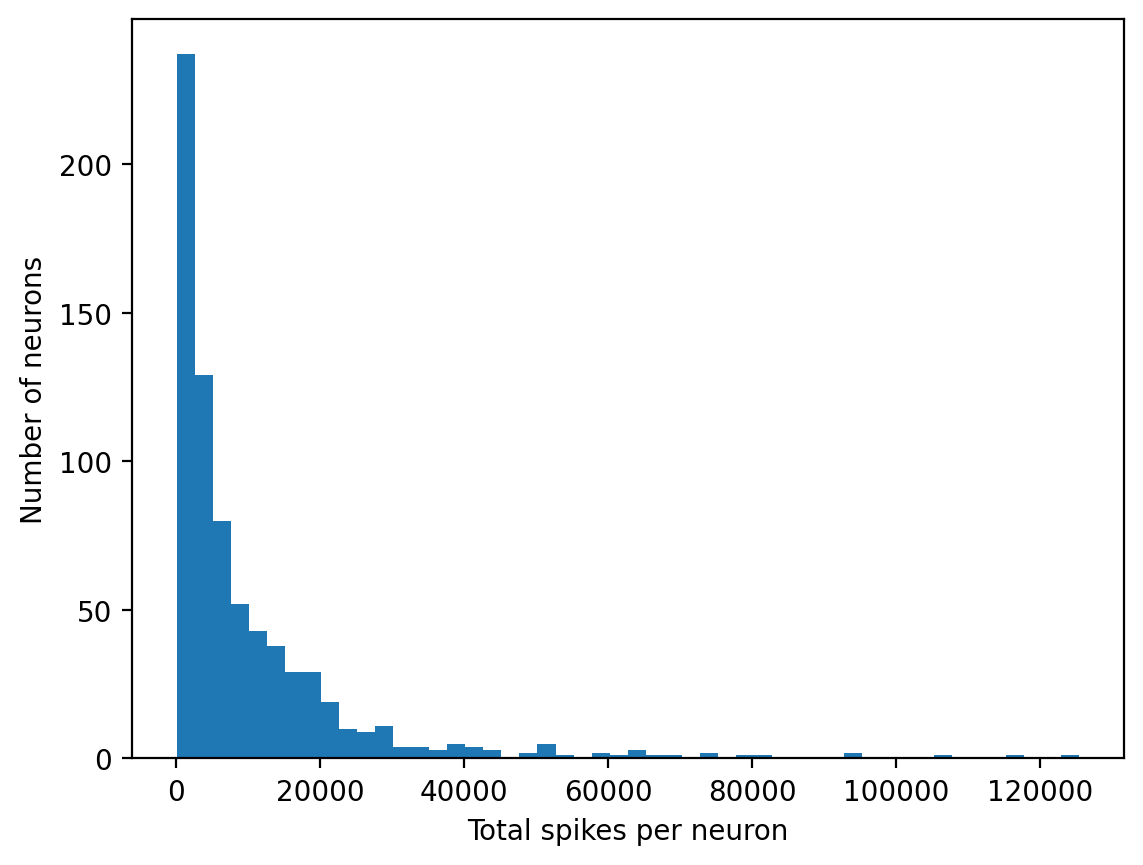

In [15]:
plt.hist(total_spikes_per_neuron, bins=50)
plt.xlabel("Total spikes per neuron")
plt.ylabel("Number of neurons");

Let's see what percentage of neurons have a below-average spike count:

In [21]:
mean_spike_count = np.mean(total_spikes_per_neuron)
frac_below_mean = (total_spikes_per_neuron < mean_spike_count).mean()
print(f"{frac_below_mean:2.1%} of neurons are below the mean")
# hartmann: also show the mean of the dataset, which should be interesting, too ;-) 
print(f"the mean of spikes per neuron in the dataset is: {mean_spike_count:7.1f}")

68.0% of neurons are below the mean
the mean of spikes per neuron in the dataset is: 10319.4


We can also see this by adding the average spike count to the histogram plot:

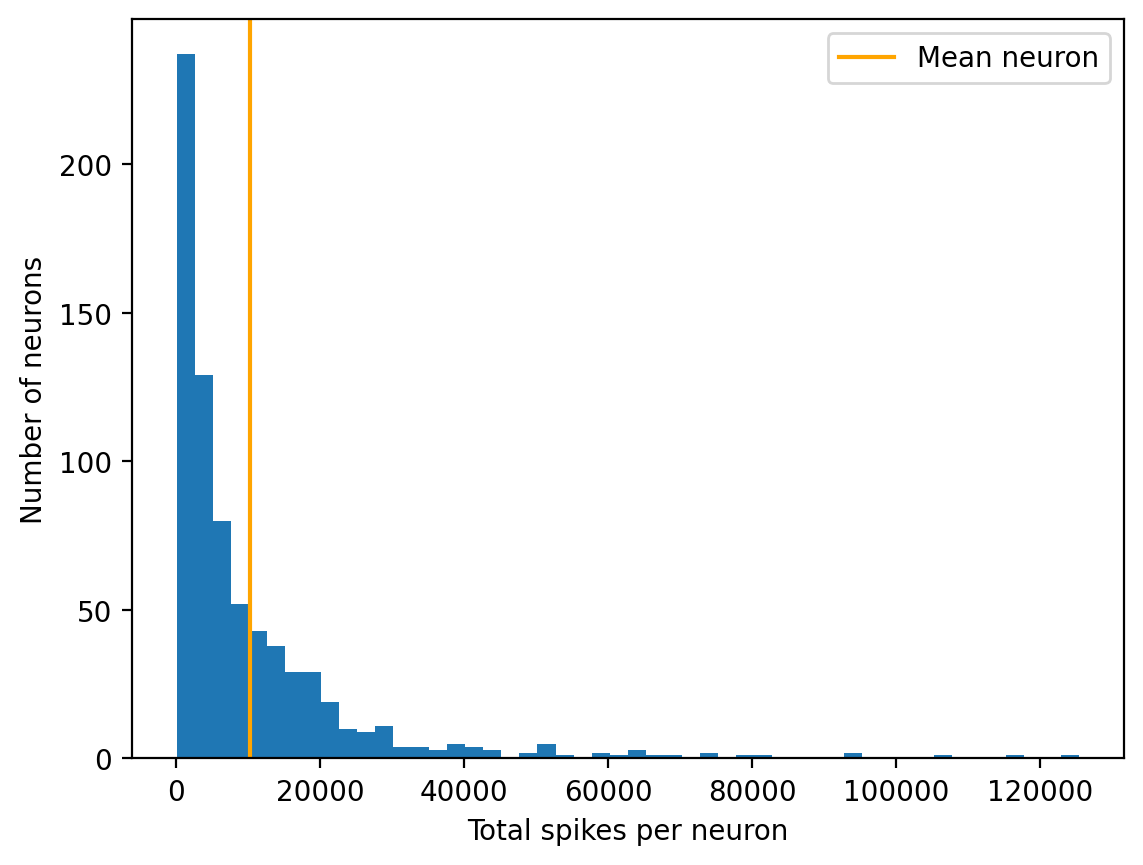

In [20]:
plt.hist(total_spikes_per_neuron, bins=50)
plt.xlabel("Total spikes per neuron")
plt.ylabel("Number of neurons")
plt.axvline(mean_spike_count, color="orange", label="Mean neuron")
plt.legend();

This shows that the majority of neurons are relatively "quiet" compared to the mean, while a small number of neurons are exceptionally "loud": they must have spiked more often to reach a large count.

### Exercise 1: Comparing mean and median neurons

If the mean neuron is more active than 68% of the population, what does that imply about the relationship between the mean neuron and the median neuron?

*Exercise objective:* Reproduce the plot above, but add the median neuron.


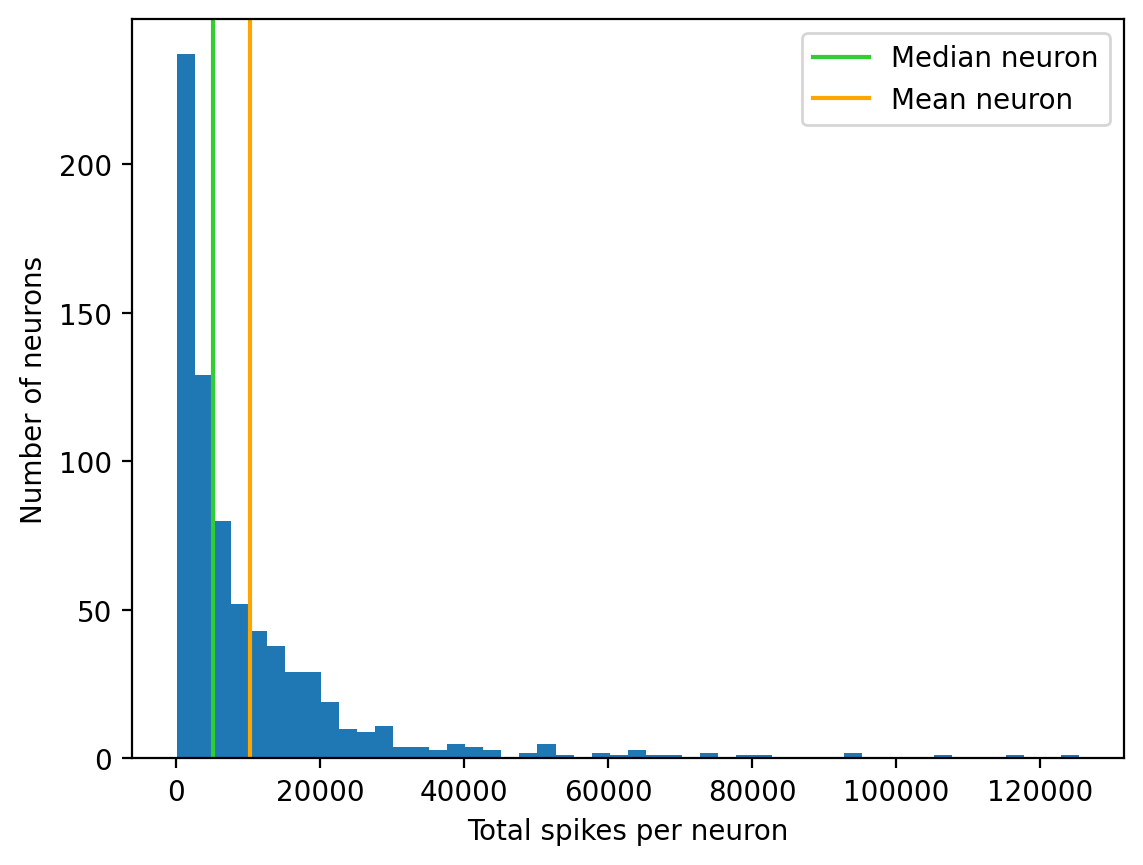

In [28]:
# To complete the exercise, fill in the missing parts (...) and uncomment the code

median_spike_count = np.median(total_spikes_per_neuron)  # Hint: Try the function np.median
plt.hist(total_spikes_per_neuron, bins=50)
plt.axvline(median_spike_count, color="limegreen", label="Median neuron")
plt.axvline(mean_spike_count, color="orange", label="Mean neuron")
plt.xlabel("Total spikes per neuron")
plt.ylabel("Number of neurons")
plt.legend()


*Bonus:* The median is the 50th percentile. What about other percentiles? Can you show the interquartile range on the histogram?

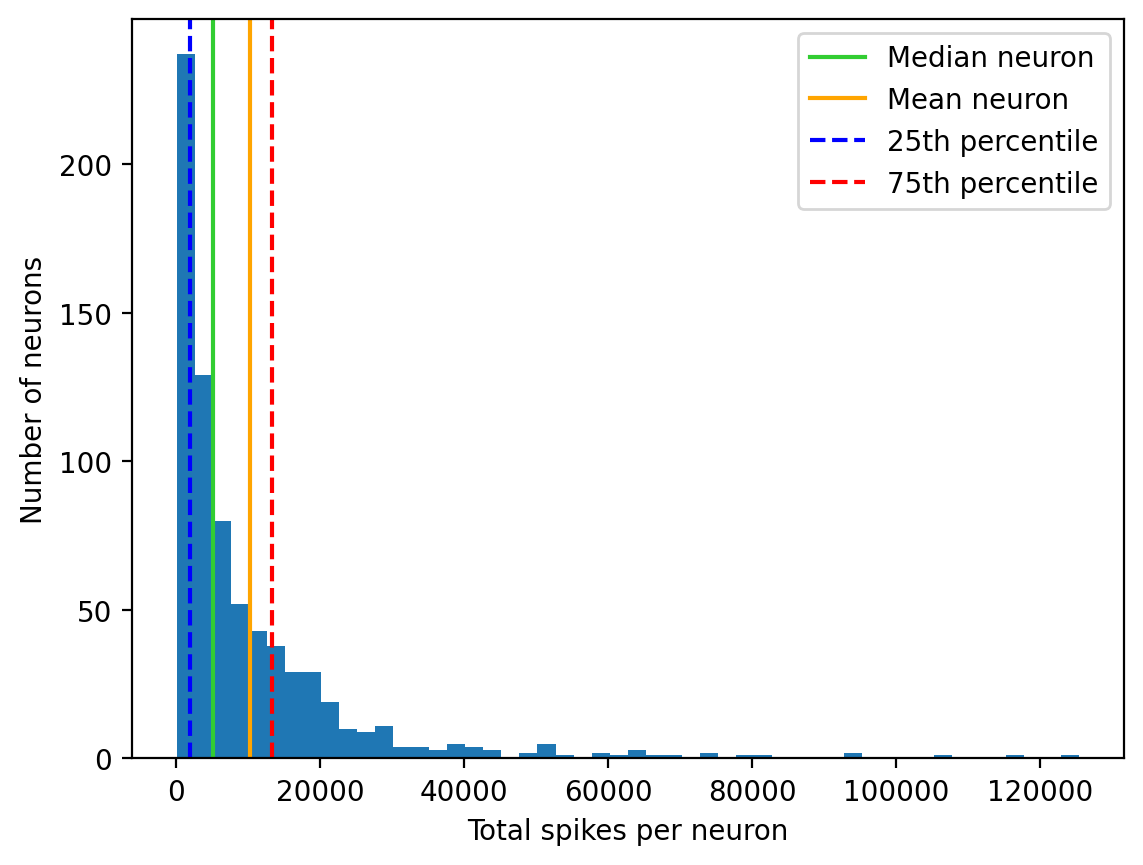

Interquartile Range (IQR): 11490.0


In [29]:
# Calculate the 25th and 75th percentiles
q25, q75 = np.percentile(total_spikes_per_neuron, [25, 75])
iqr = q75 - q25

# Plot the histogram
plt.hist(total_spikes_per_neuron, bins=50)
plt.axvline(median_spike_count, color="limegreen", label="Median neuron")
plt.axvline(mean_spike_count, color="orange", label="Mean neuron")
plt.axvline(q25, color="blue", linestyle="--", label="25th percentile")
plt.axvline(q75, color="red", linestyle="--", label="75th percentile")
plt.xlabel("Total spikes per neuron")
plt.ylabel("Number of neurons")
plt.legend()
plt.show()

print(f"Interquartile Range (IQR): {iqr}") 


---

# Section 2: Visualizing neuronal spiking activity

## Section 2.1: Getting a subset of the data

Now we'll visualize trains of spikes. Because the recordings are long, we will first define a short time interval and restrict the visualization to only the spikes in this interval. We defined a utility function, `restrict_spike_times`, to do this for you. If you call `help()` on the function, it will tell you a little bit about itself:

In [30]:
help(restrict_spike_times)

Help on function restrict_spike_times in module __main__:

restrict_spike_times(spike_times, interval)
    Given a spike_time dataset, restrict to spikes within given interval.
    
    Args:
      spike_times (sequence of np.ndarray): List or array of arrays,
        each inner array has spike times for a single neuron.
      interval (tuple): Min, max time values; keep min <= t < max.
    
    Returns:
      np.ndarray: like `spike_times`, but only within `interval`



In [31]:
t_interval = (5, 15)  # units are seconds after start of recording
interval_spike_times = restrict_spike_times(spike_times, t_interval)

Is this a representative interval? What fraction of the total spikes fall in this interval?

In [32]:
original_counts = sum([len(spikes) for spikes in spike_times])
interval_counts = sum([len(spikes) for spikes in interval_spike_times])
frac_interval_spikes = interval_counts / original_counts
print(f"{frac_interval_spikes:.2%} of the total spikes are in the interval")

0.33% of the total spikes are in the interval


How does this compare to the ratio between the interval duration and the experiment duration? (What fraction of the total time is in this interval?)

We can approximate the experiment duration by taking the minimum and maximum spike time in the whole dataset. To do that, we "concatenate" all of the neurons into one array and then use `np.ptp` ("peak-to-peak") to get the difference between the maximum and minimum value:

In [33]:
spike_times_flat = np.concatenate(spike_times)
experiment_duration = np.ptp(spike_times_flat)
interval_duration = t_interval[1] - t_interval[0]

frac_interval_time = interval_duration / experiment_duration
print(f"{frac_interval_time:.2%} of the total time is in the interval")

0.37% of the total time is in the interval


These two values—the fraction of total spikes and the fraction of total time—are similar. This suggests the average spike rate of the neuronal population is not very different in this interval compared to the entire recording.

## Section 2.2: Plotting spike trains and rasters

Now that we have a representative subset, we're ready to plot the spikes, using the matplotlib `plt.eventplot` function. Let's look at a single neuron first:

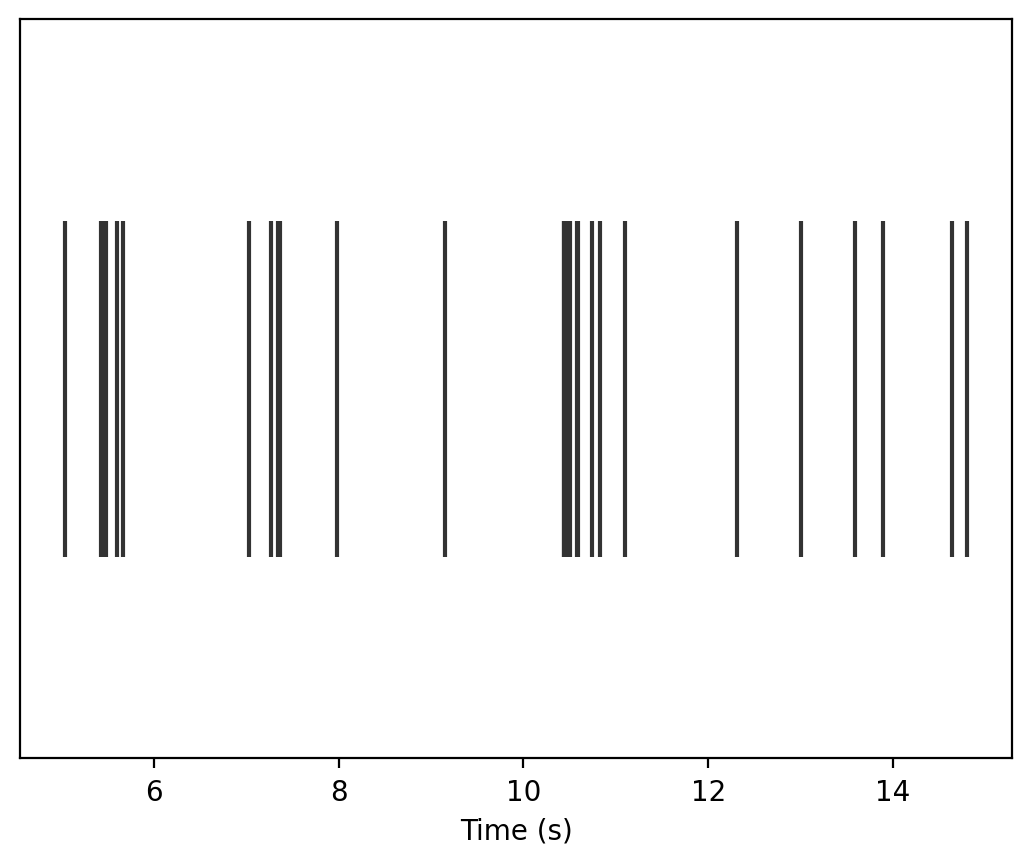

In [36]:
neuron_idx = 1
plt.eventplot(interval_spike_times[neuron_idx], color=".2")
plt.xlabel("Time (s)")
plt.yticks([]);

We can also plot multiple neurons. Here are three:

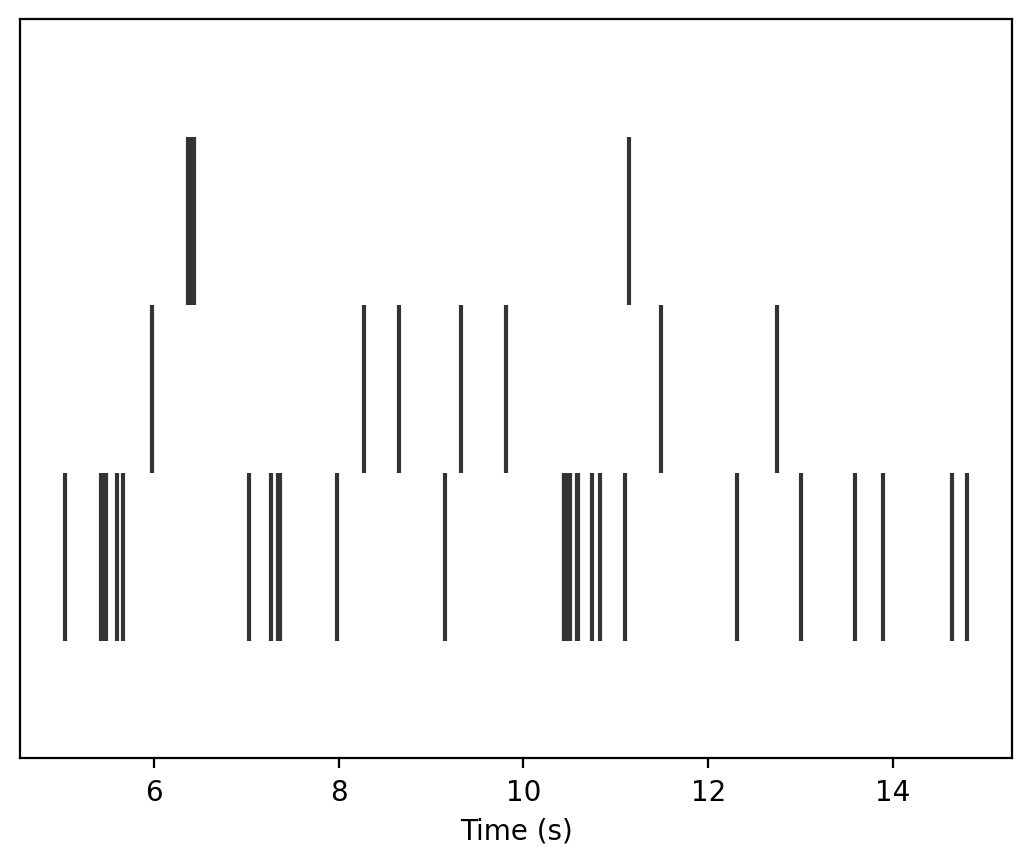

In [37]:
neuron_idx = [1, 11, 51]
plt.eventplot(interval_spike_times[neuron_idx], color=".2")
plt.xlabel("Time (s)")
plt.yticks([]);

This makes a "raster" plot, where the spikes from each neuron appear in a different row.

Plotting a large number of neurons can give you a sense for the characteristics in the population. Let's show every 5th neuron that was recorded:

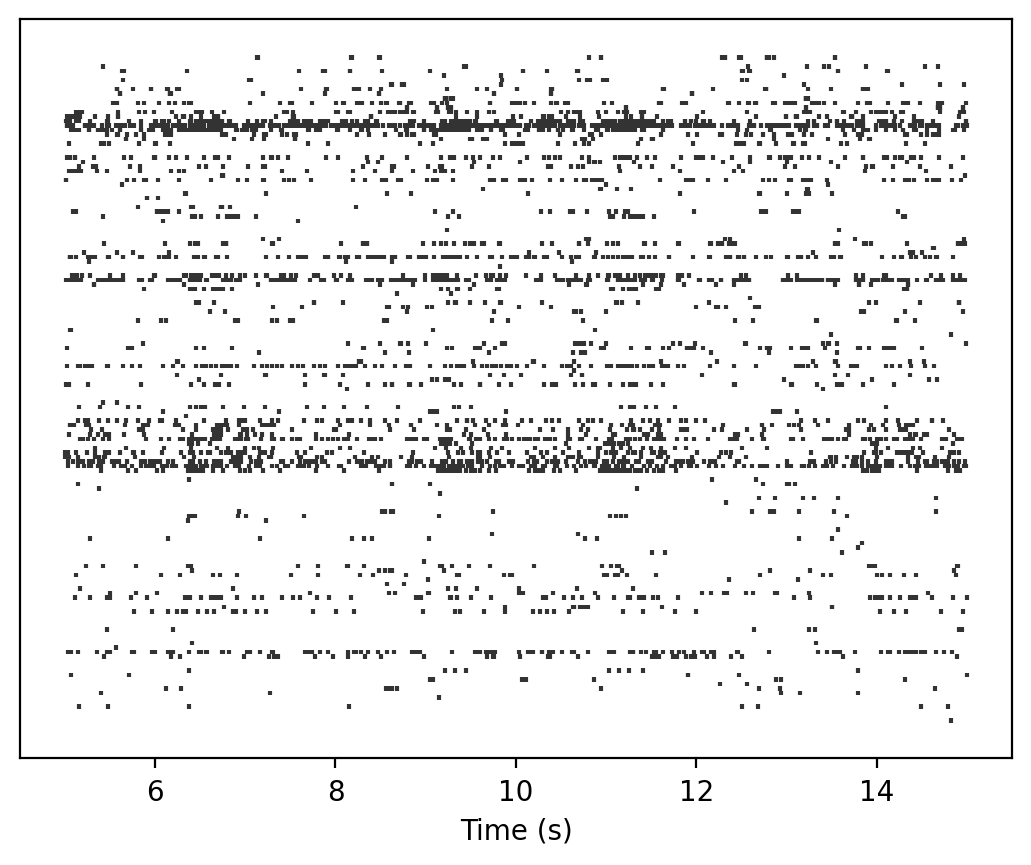

In [38]:
neuron_idx = np.arange(0, len(spike_times), 5)
plt.eventplot(interval_spike_times[neuron_idx], color=".2")
plt.xlabel("Time (s)")
plt.yticks([]);

*Question*: How does the information in this plot relate to the histogram of total spike counts that you saw above?

### *Answer*: Relationship between histogram and eventplot:

By analyzing both visualizations together:

- The event plot provides detailed, fine-grained timing information.
- The histogram offers a more compact, quantitative summary of the activity over time.

---

# Section 3: Inter-spike intervals and their distributions

Given the ordered arrays of spike times for each neuron in `spike_times`, which we've just visualized, what can we ask next? 

Scientific questions are informed by existing models. So, what knowledge do we already have that can inform questions about this data?

We know that there are physical constraints on neuron spiking. Spiking costs energy, which the neuron's cellular machinery can only obtain at a finite rate. Therefore neurons should have a refractory period: they can only fire as quickly as their metabolic processes can support, and there is a minimum delay between consecutive spikes of the same neuron.

More generally, we can ask "how long does a neuron wait to spike again?" or "what is the longest a neuron will wait?" Can we transform spike times into something else, to address questions like these more directly?

We can consider the inter-spike times (or interspike intervals: ISIs). These are simply the time differences between consecutive spikes of the same neuron.

### Exercise 2: Plot the distribution of ISIs for a single neuron

*Exercise objective:* make a histogram, like we did for spike counts, to show the distribution of ISIs for one of the neurons in the dataset.

Do this in three steps:

1. Extract the spike times for one of the neurons
2. Compute the ISIs (the amount of time between spikes, or equivalently, the difference between adjacent spike times)
3. Plot a histogram with the array of individual ISIs

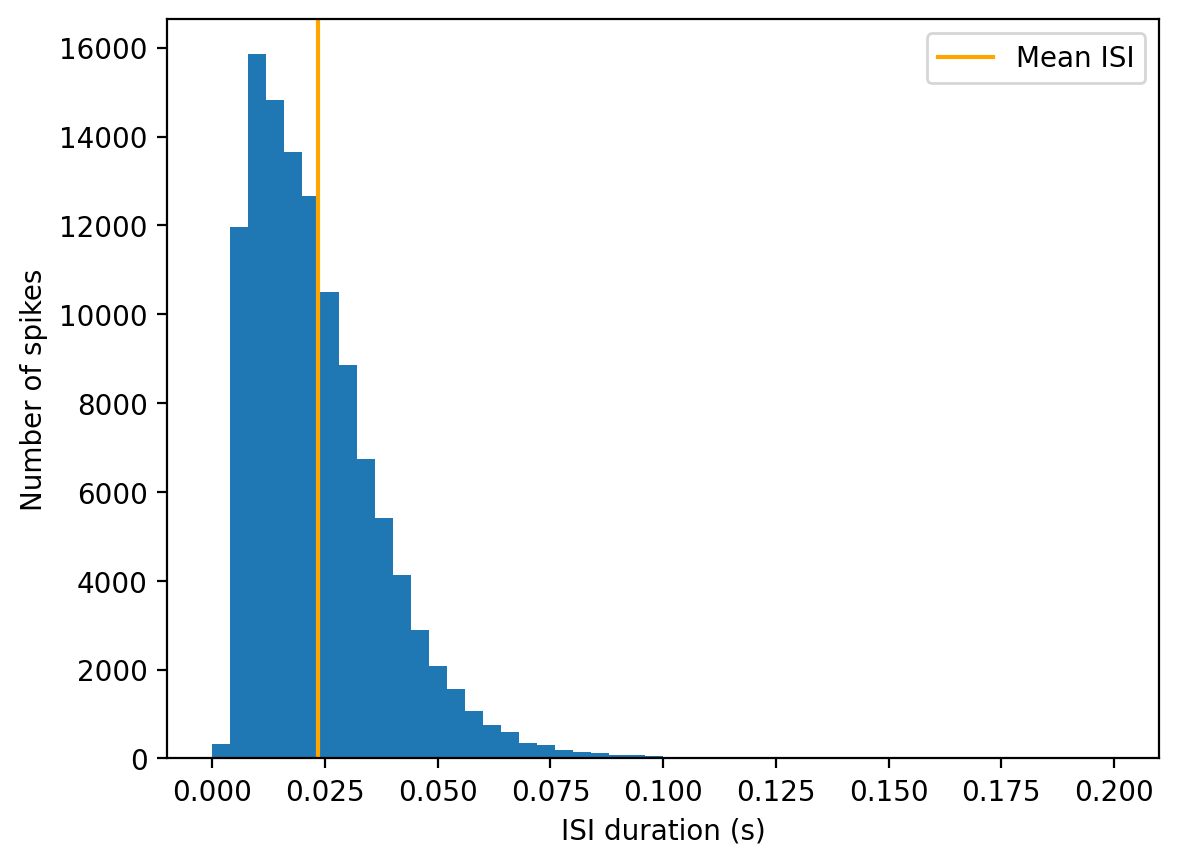

In [52]:
def compute_single_neuron_isis(spike_times, neuron_idx):
  """Compute a vector of ISIs for a single neuron given spike times.

  Args:
    spike_times (list of 1D arrays): Spike time dataset, with the first
      dimension corresponding to different neurons.
    neuron_idx (int): Index of the unit to compute ISIs for.

  Returns:
    isis (1D array): Duration of time between each spike from one neuron.
  """
  #############################################################################
  # Students: Fill in missing code (...) and comment or remove the next line
  # raise NotImplementedError("Exercise: compute single neuron ISIs")
  #############################################################################

  # Extract the spike times for the specified neuron
  single_neuron_spikes = spike_times[neuron_idx]

  # Compute the ISIs for this set of spikes
  # Hint: the function np.diff computes discrete differences along an array
  isis = np.diff(single_neuron_spikes)

  return isis

# Uncomment the following lines when you are ready to test your function
single_neuron_isis = compute_single_neuron_isis(spike_times, neuron_idx=283)
plt.hist(single_neuron_isis, bins=50, range=(0, 0.20), histtype="stepfilled")
plt.axvline(single_neuron_isis.mean(), color="orange", label="Mean ISI")
plt.xlabel("ISI duration (s)")
plt.ylabel("Number of spikes")
plt.legend()
plt.show()

---

In general, the shorter ISIs are predominant, with counts decreasing rapidly (and smoothly, more or less) with increasing ISI. However, counts also rapidly decrease to zero with _decreasing_ ISI, below the maximum of the distribution (8-11 ms). The absence of these very low ISIs agrees with the refractory period hypothesis: the neuron cannot fire quickly enough to populate this region of the ISI distribution.

Check the distributions of some other neurons. To resolve various features of the distributions, you might need to play with the value of `n_bins`. Using too few bins might smooth over interesting details, but if you use too many bins, the random variability will start to dominate.

You might also want to restrict the range to see the shape of the distribution when focusing on relatively short or long ISIs. *Hint:* the third argument to `plt.hist` sets the interval to define bins over.

---

# Section 4: What is the functional form of an ISI distribution?

The ISI histograms seem to follow continuous, monotonically decreasing functions above their maxima. The function is clearly non-linear. Could it belong to a single family of functions?

To motivate the idea of using a mathematical function to explain physiological phenomena, let's define a few different function forms that we might expect the relationship to follow: exponential, inverse, and linear.

In [53]:
def exponential(xs, scale, rate, x0):
  """A simple parametrized exponential function, applied element-wise.

  Args:
    xs (np.ndarray or float): Input(s) to the function.
    scale (float): Linear scaling factor.
    rate (float): Exponential growth (positive) or decay (negative) rate.
    x0 (float): Horizontal offset.

  """
  ys = scale * np.exp(rate * (xs - x0))
  return ys

def inverse(xs, scale, x0):
  """A simple parametrized inverse function (`1/x`), applied element-wise.

  Args:
    xs (np.ndarray or float): Input(s) to the function.
    scale (float): Linear scaling factor.
    x0 (float): Horizontal offset.

  """
  ys = scale / (xs - x0)
  return ys

def linear(xs, slope, y0):
  """A simple linear function, applied element-wise.

  Args:
    xs (np.ndarray or float): Input(s) to the function.
    slope (float): Slope of the line.
    y0 (float): y-intercept of the line.

  """
  ys = slope * xs + y0
  return ys

### Interactive Demo: ISI functions explorer

Here is an interactive demo where you can vary the parameters of these functions and see how well the resulting outputs correspond to the data. Adjust the parameters by moving the sliders and see how close you can get the lines to follow the falling curve of the histogram. This will give you a taste of what you're trying to do when you *fit a model* to data.

"Interactive demo" cells have hidden code that defines an interface where you can play with the parameters of some function using sliders. You don't need to worry about how the code works – but you do need to **run the cell** to enable the sliders.


In [ ]:
#@title

#@markdown Be sure to run this cell to enable the demo
# Don't worry about understanding this code! It's to setup an interactive plot.
single_neuron_idx = 283
single_neuron_spikes = spike_times[single_neuron_idx]
single_neuron_isis = np.diff(single_neuron_spikes)

counts, edges = np.histogram(
  single_neuron_isis,
  bins=50,
  range=(0, single_neuron_isis.max())
)

functions = dict(
  exponential=exponential,
  inverse=inverse,
  linear=linear,
)

colors = dict(
  exponential="C1",
  inverse="C2",
  linear="C4",
)

@widgets.interact(
  exp_scale=widgets.FloatSlider(1000, min=0, max=20000, step=250),
  exp_rate=widgets.FloatSlider(-10, min=-200, max=50, step=1),
  exp_x0=widgets.FloatSlider(0.1, min=-0.5, max=0.5, step=0.005),
  inv_scale=widgets.FloatSlider(1000, min=0, max=3e2, step=10),
  inv_x0=widgets.FloatSlider(0, min=-0.2, max=0.2, step=0.01),
  lin_slope=widgets.FloatSlider(-1e5, min=-6e5, max=1e5, step=10000),
  lin_y0=widgets.FloatSlider(10000, min=0, max=4e4, step=1000),
)
def fit_plot(
  exp_scale=1000, exp_rate=-10, exp_x0=0.1,
  inv_scale=1000, inv_x0=0,
  lin_slope=-1e5, lin_y0=2000,
):
  """Helper function for plotting function fits with interactive sliders."""
  func_params = dict(
    exponential=(exp_scale, exp_rate, exp_x0),
    inverse=(inv_scale, inv_x0),
    linear=(lin_slope, lin_y0),
  )
  f, ax = plt.subplots()
  ax.fill_between(edges[:-1], counts, step="post", alpha=.5)
  xs = np.linspace(1e-10, edges.max())
  for name, function in functions.items():
    ys = function(xs, *func_params[name])
    ax.plot(xs, ys, lw=3, color=colors[name], label=name);
  ax.set(
      xlim=(edges.min(), edges.max()),
      ylim=(0, counts.max() * 1.1),
      xlabel="ISI (s)",
      ylabel="Number of spikes",
  )
  ax.legend()

interactive(children=(FloatSlider(value=1000.0, description='exp_scale', max=20000.0, step=250.0), FloatSlider…

# Summary

In this tutorial, we loaded some neural data and poked at it to understand how the dataset is organized. Then we made some basic plots to visualize (1) the average level of activity across the population and (2) the distribution of ISIs for an individual neuron. In the very last bit, we started to think about using mathematical formalisms to understand or explain some physiological phenomenon. All of this only allowed us to understand "What" the data looks like.

This is the first step towards developing models that can tell us something about the brain. That's what we'll focus on in the next two tutorials.